In [ ]:
# Graph-tool is not available in the standard colab environment so we must first install it...
# %%capture
!wget https://downloads.skewed.de/skewed-keyring/skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!dpkg -i skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!echo "deb [signed-by=/usr/share/keyrings/skewed-keyring.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

In [ ]:
import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1544: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from partially initialized module 'gi' (most likely due to a circular import) (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
g = gt.Graph([(0,1),(0,4),(1,4),(1,5),(1,2),(2,5),(2,3),(2,6),(3,6),(3,7),(4,5),(5,6),(6,7)], directed=False)

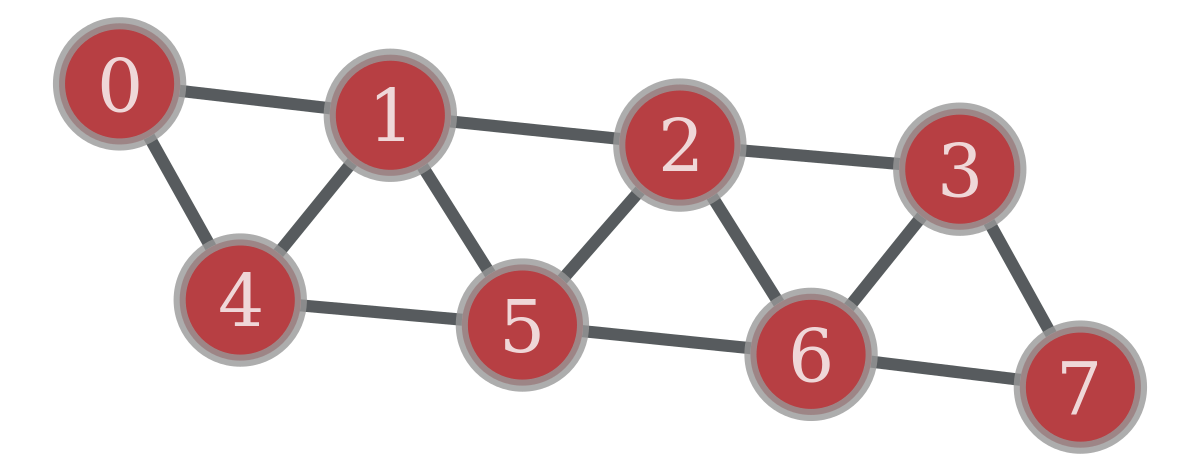

In [ ]:
gt.graph_draw(g,vertex_text=g.vertex_index)
plt.show()

In [ ]:
# global clustering
print(gt.global_clustering(g)[0])

0.5625


In [ ]:
# local clustering
clust = gt.local_clustering(g)
print(gt.vertex_average(g, clust)[0])

0.6666666666666666


In [ ]:
# average path length
dist = gt.shortest_distance(g)
ave_path_length = sum([sum(i) for i in dist])/(g.num_vertices()**2-g.num_vertices())
print(ave_path_length)

1.7857142857142858


In [ ]:
h = g.copy()

In [ ]:
h.remove_edge((0,1))
h.remove_edge((3,7))

h.add_edge(0,7)
h.add_edge(1,3)

<Edge object with source '1' and target '3' at 0x7a22861bbe20>

In [ ]:
gt.graph_draw(h,vertex_text=h.vertex_index)
plt.show()

In [ ]:
# global clustering
print(gt.global_clustering(h)[0])

0.46875


In [ ]:
# local clustering
clust = gt.local_clustering(h)
print(gt.vertex_average(h, clust)[0])

0.375


In [ ]:
# average path length
dist = gt.shortest_distance(h)
ave_path_length = sum([sum(i) for i in dist])/(h.num_vertices()**2-h.num_vertices())
print(ave_path_length)

1.6428571428571428
